# 모델 성능 평가

### 분류 모델의 평가 지표

https://sumniya.tistory.com/26

: 예측 대상이 범주형 데이터 경우
- 정확도(Accuracy)
- 재현율(Recall)
- 정밀도(Precision)
- F1 measure
- G measure
- ROC curve
- AUC

### 회귀 모델의 평가 지표
: 예측 대상이 수치 데이터인 경우
- MSE(Mean Square Error)
- RMSE(Root Mean Square Error)
- MAE(Mean Absolute Error)
- MAPE(Mean Absolute Percentage Error)
- $ R^2 $

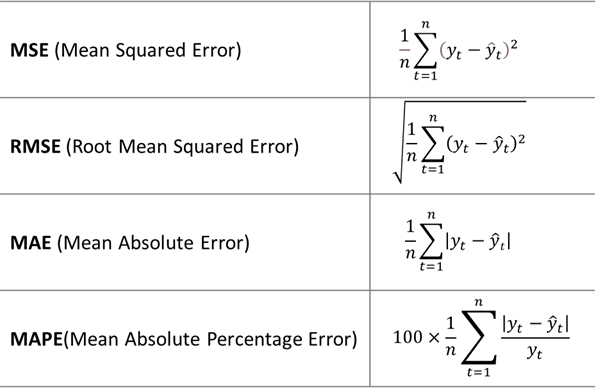


# 분류 모델의 성능 평가 지표

## Accuracy(정확도)

- 실제 데이터와 예측 데이터가 얼마나 같은지를 판단하는 지표

- $ 정확도(Accuracy) =  \frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수} $

### 정확도 문제 예
1. 타이타닉 생존자 예측
2. MNIST 데이터 세트

In [63]:
import numpy as np

### 1. 타이타닉 생존자 예측

- 생존자 예측 Classifier 정의 : BaseEstimator 상속 받음
- 아무런 학습을 하지 않고 성별에 따라 생존자를 예측

In [64]:
# 아무런 학습을 하지 않고 성별에 따라 생존자를 예측하는 
# 단순한 Classifier 생성
# BaseEstimator 상속 받음

# 생존자 중 여자의 비율이 높으니 단순히 여자는 다 생존이라고 표기하고, 남자는 다 사망이라고 표기하는 클래스 생성
# 이렇게 설정하여 accuracy를 측정해도 높은 점수가 나온다 (단순 측정의 단점)
from sklearn.base import BaseEstimator

class myClassifier(BaseEstimator):
    def fit(self, X , y=None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0] , 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] ==  0 : #여성
                pred[i] = 1
            else:
                pred[i] = 0
        return pred


**MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행**

In [65]:
# 데이터 전처리 부분


# 데이터 가공 (타이타닉 생존자 예측 시 작성)

from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    # Age , Cabin , Embarked
    df['Age'].fillna(df['Age'].mean() , inplace=True)
    df['Cabin'].fillna('N' , inplace=True)
    df['Embarked'].fillna('N' , inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    # PassengerId , Name, Ticket 제거
    df.drop(['PassengerId' , 'Name' , 'Ticket'], axis=1 , inplace=True)
    return df
   

# 레이블 인코딩 수행 
def format_features(df):
    # Cabin의 첫 문자 추출
    df['Cabin'] = df['Cabin'].str[:1]
    # Cabin , Sex , Embarked를 LabelEncoding
    features = ['Cabin' , 'Sex' , 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df



# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_dataFrame(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [66]:
import pandas as pd

# 타이타닉 생존자 예측 

# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('datasets/titanic/train.csv')
transform_dataFrame(titanic_df)

# Target dataset
y = titanic_df['Survived']

# Input dataset : 'Survived' 칼럼 제외
X = titanic_df.drop(columns=['Survived'])

In [67]:
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y  , test_size=0.2 , random_state=42)


In [68]:
titanic_df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [69]:
X['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [70]:
# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행. 
my_clf = myClassifier()
my_clf.fit(X_train, y_train)
pred = my_clf.predict(X_test)


In [71]:
y_test[:10]

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64

In [72]:
pred[:10]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [73]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test , pred)
print(acc)

# 성별로만 예측을 해도 78% 정도가 나온다
# 정확도만 보고 계산해서 이러한 결과가 나온다
# 다른 평가지표까지 고려해서 평가를 하는 것이 의미가 있다

0.7821229050279329


### 2. MNIST 데이터 세트
* 사이킷런의 load_digits() API를 통해 MNIST 데이터 세트 제공

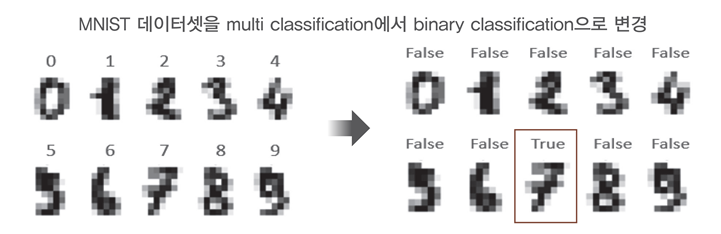

- 불균현항 데이터 세트로 변형
- 레이블값이 7인 것만 True, 나머지 값은 모두 False로 변환
- True : 전체 데이터의 10%
- False : 90%

**이진 분류 문제로 변환**

    
**입력되는 모든 데이터를 False, 즉 0으로 예측하는 classifier를 이용해**
- 정확도를 측정하면 약 90%에 가까운 예측 정확도를 나타냄

### 정확도 평가 지표의 맹점

- 0으로 예측하는 classifier 정의
- 아무것도 하지 않고 무조건 특정한 결과로 찍어도 데이터가 균일하지 않은 경우 높은 수치가 나타날 수 있음

In [74]:
# 모듈 임포트
# sklearn 라이브러리의 기본 클래스
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

In [75]:
# MyNumClassifier는 사이킷런의 Classifier 구현을 흉내낸것 입니다. 

# 사이킷런 프레임웍은 분류를 위한 수행 객체로 Classifier를 가집니다.
# 가령 DecisionTreeClassifier, RandomForestClassifier등 다양한 분류 알고리즘을 구현한 Classifier를 제공합니다.
# 보통은 이들 Classifier객체들은 Regressor 객체와 함께 Estimator라고 불립니다. 

# 이들 Estimator는 사이킷런 프레임웍에서 GridSearchCV, cross_val_score() 등 
# 다양한 Utility class들과 함께 자연스럽게 결합될 수 있는데, 이걸 적용하려면 
# 모든 Estimator들은 BaseEstimator라는 것을 상속 받아야 합니다.  
# 그래서 MyDummyClassifier에서 BaseEstimator를 상속 받았습니다. 

# 물론 이렇게 BaseEstimator를 상속받지 않고, fit(), predict()를 구현할 수도 있습니다만, 

# 사이킷런 프레임웍의 다른 Estimator 동작방식과 유사한 설명을 드리기 위해서 그렇게 구현한 것입니다. 

# 그리고 fit() 메서드는 적어주신대로 아무것도 학습하지 않습니다. 
# 그런데 정확도(Accuracy)의 경우는 아무것도 학습하지 않은 상태임에도 좋은 예측 수치를 보여 줄수가 있습니다. 
# 즉 그냥 찍어도 꽤 놓은 수치가 나올수 있는 경우가 바로 정확도 이기 때문에 정확도 수치에는 맹점이 있을 수 있습니다. 

# 이를 설명 드리기 위해,  Machine Learning의 일반적인 학습 프로세스,
# 가령 예를 들어 학습과 검증 세트로 나눈 다음에 fit(X_train, y_train)으로 아무것도 아닌 학습을 하고, 
# predict() 예측을 했을 때, 그렇게 나오면 안됨에도 불구하고 정확도 수치가 높게 나올 수 있는 경우를 보여 드리기 위해서 만든 것입니다. 

# "사이킷런은 BaseEstimator를 상속받으면 customized형태의 estimator를 개발자가 생성할 수 있다"
# 본인이 생성할 수 있는 estimator 이다



from sklearn.base import BaseEstimator

class MyNumClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self,X):
        return np.zeros((len(X) , 1) , dtype=bool)
    # X의 길이 만큼 zeros를 만든다

    # 레이블 값이 7인 것만 True, 나머지 값은 모두 False로 변환해 이진 분류 문제로 바꿈
    # 즉 전체 데이터의 10%만 True , 나머지 90%는 False인 불균형한 데이터 세트로 변형
# 불균형한 데이터 세트에 모든 데이터를 False, 즉 0으로 예측하는 classifier를 이용해 정확도를 측정한다

**digit 데이터 로드**

In [76]:
# digit 데이터 로드
digits = load_digits()

In [77]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [78]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [79]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [80]:
digits.data.shape

(1797, 64)

**7인 데이터 확인**

In [81]:
digits.target == 7

array([False, False, False, ..., False, False, False])

**7인 데이터는 1, 그외 데이터는 0으로 변환**

In [82]:
# digits 번호가 7번이면 True 이고 이를 astype(int)로 1로 변환
# 7번이 아니라면 False이고 0으로 변환

y = (digits.target==7).astype(int)

In [83]:
y

array([0, 0, 0, ..., 0, 0, 0])

**학습 / 테스트 데이터 세트로 분리 (default = 0.25))**

In [84]:
# 학습 / 테스트 데이터 세트로 분리 (default = 0.25)
X_train , X_test , y_train , y_test = train_test_split(digits.data , y , random_state=11)

In [85]:
X_train

array([[ 0.,  0.,  3., ..., 12., 14.,  7.],
       [ 0.,  1.,  9., ..., 10.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 16., 13.,  1.],
       [ 0.,  1., 11., ..., 13., 16.,  5.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [86]:
X_test

array([[ 0.,  0.,  7., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1., 13., ..., 15.,  3.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., 12.,  0.,  0.]])

In [87]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [88]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [89]:
y_test.shape

(450,)

**불균형한 레이블 데이터 분포도 확인**

In [90]:
# 불균형한 레이블 데이터 분포도 확인
pd.Series(y_test).value_counts() 

0    405
1     45
dtype: int64

In [91]:
# Dummy Classifier로 학습/예측/정확도 평가

fake_clf = MyNumClassifier()
fake_clf.fit(X_train, y_train)
pred = fake_clf.predict(X_test)
acc = accuracy_score(y_test , pred)
print('정확도' , acc)

# 결국 450/(450+45) 이다

정확도 0.9


In [92]:
# MNIST의 fakepred

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test , pred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

# Confusion Matrix (오차 행렬)

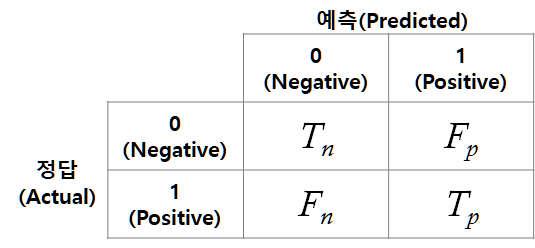

** 불균형한 이진분류 모델**
- 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의 결과 값에 Positive를 설정해 1 값을 부여하고
- 그렇지 않은 경우 Negative로 0을 부여하는 경우가 많음

예1) 사기 행위 예측 모델
- 사기 행위 : Positive 양성으로 1
- 정상 행위 : Negitive 음성으로 0

예2) 암 검진 예측 모델
- 양성 : Positive 양성으로 1
- 음성 : Negative 음성으로 0 

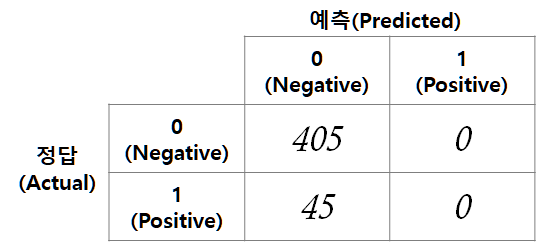

**TN, FP, FN, TP 값은 Classifier 성능의 여러 면모를 판단할 수 있는 기반 정보 제공**
- 이 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도(Accuracy), 정밀도(Predision), 재현율(Recall) 값을 알 수 있음

### 오차행렬 상에서 정확도

* 정확도(Accuracy) = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수

    $ = \frac{TN + TP}{ TN + FP + FN + TP }$

# 정밀도(Precision)와 재현율(Recall)

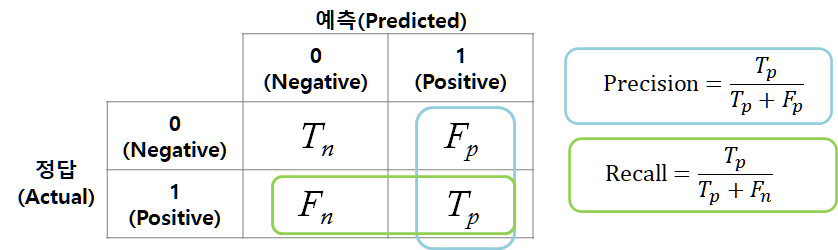

### 정밀도 : TP / (FP + TP)
* Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 
- FP+TP : 실제 값이 Positive 인 모든 데이터 건수 ( 실제 양성)
- TP : 예측과 실제 값이 Positive로 일치한 데이터 건수 (맞춘 양성)
* **양성 예측도**라고도 불림

### 재현율 : TP / (FN + TP)
* 실제값이 Positive인 대상 중 예측과 실제 값이 Positive로 일치한 데이터의 비율

* **민감도(Sensitivity) 또는 TPR(True Positive Rate)**이라고도 불림

** 재현율이 상대적으로 더 중요한 지표인 경우
- 실제 Positive 양성인 데이터 예측을 Negitive로 잘못 판단하게 되면
- 업무한 큰 영향이 발생하는 경우

** 정밀도가 상대적으로 더 중요한 지푱니 경우
- 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면
- 업무상 큰 영향을 발생하는 경우

### MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정

- 타이타닉 데이터를 로지스틱 회귀로 분류 수행

In [93]:
from sklearn.base import BaseEstimator

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self,X):
        return np.zeros((len(X) , 1) , dtype=bool)
    # X의 길이 만큼 zeros를 만든다
    
digits = load_digits()
y = (digits.target==7).astype(int)
X_train , X_test , y_train , y_test = train_test_split(digits.data , y , random_state=11)

fake_clf = MyFakeClassifier()
fake_clf.fit(X_train, y_train)
fakepred = fake_clf.predict(X_test)

In [94]:
# 참고 : fakepred 값 확인
# fakepred # (모두 False)

In [95]:
# 정밀도와 재현율 계산
# 정밀도 계산 : precision_score(실제값 , 예측값)
# 정밀도 계산 : recall_score(실제값 , 예측값)

from sklearn.metrics import precision_score , recall_score

print('정밀도' , precision_score(y_test, pred))
print('재현율' , recall_score(y_test , pred))

정밀도 0.0
재현율 0.0


C:\Users\hspar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수

In [96]:
from sklearn.metrics import accuracy_score, precision_score , recall_score, confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test , pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도{0:.3f} , 정밀도{1:.3f} , 재현율:{2:.3f} ' . format(accuracy , precision, recall))

**앞의 타이타닉 데이터 세트 전처리 작업 내**

In [97]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    # Age , Cabin , Embarked
    df['Age'].fillna(df['Age'].mean() , inplace=True)
    df['Cabin'].fillna('N' , inplace=True)
    df['Embarked'].fillna('N' , inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    # PassengerId , Name, Ticket 제거
    df.drop(['PassengerId' , 'Name' , 'Ticket'], axis=1 , inplace=True)
    return df
   

# 레이블 인코딩 수행 
def format_features(df):
    # Cabin의 첫 문자 추출
    df['Cabin'] = df['Cabin'].str[:1]
    # Cabin , Sex , Embarked를 LabelEncoding
    features = ['Cabin' , 'Sex' , 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df



# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_dataFrame(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [118]:
# 로지스틱 회귀 기반으로 LogisticRegression
# 타이타닉 생존자 예측하고
# confusion matrix, accuracy , recall 평가 수행

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할

# 모듈 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score , recall_score, confusion_matrix
from sklearn.model_selection import train_test_split



# 데이터 로드 : 데이터 프레임으로 저장
titanic_df = pd.read_csv('datasets/titanic/train.csv')
titanic_df = transform_dataFrame(titanic_df)
Y = titanic_df['Survived']
X = titanic_df.drop(columns=['Survived'])

# 학습/테스트 데이터 분할

X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size=0.25 , random_state=56)

# 로지스틱 회귀 객체 생성
lr = LogisticRegression()

# 학습
lr.fit(X_train , y_train)

# 평가
pred = lr.predict(X_test)

# 성능 결과 출력
print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred))
print(recall_score(y_test , pred))
print(confusion_matrix(y_test, pred))

get_clf_eval(y_test , pred)




0.8295964125560538
0.7808219178082192
0.7215189873417721
[[128  16]
 [ 22  57]]
오차행렬
[[128  16]
 [ 22  57]]
정확도0.830 , 정밀도0.781 , 재현율:0.722 


C:\Users\hspar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
# MyClassifier 로 타이타닉 생존자 예측하고
# confusion matrix, accuracy , recall 평가 수행

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할

# 모듈 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score , recall_score, confusion_matrix
from sklearn.model_selection import train_test_split



# 데이터 로드 : 데이터 프레임으로 저장
titanic_df = pd.read_csv('datasets/titanic/train.csv')
titanic_df = transform_dataFrame(titanic_df)
Y = titanic_df['Survived']
X = titanic_df.drop(columns=['Survived'])

# 학습/테스트 데이터 분할

X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size=0.25 , random_state=56)

# 로지스틱 회귀 객체 생성
my_clf = myClassifier()

# 학습
my_clf.fit(X_train , y_train)

# 평가
pred = my_clf.predict(X_test)

# 성능 결과 출력
print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred))
print(recall_score(y_test , pred))
print(confusion_matrix(y_test, pred))

get_clf_eval(y_test , pred)




0.8654708520179372
0.8656716417910447
0.7341772151898734
[[135   9]
 [ 21  58]]
오차행렬
[[135   9]
 [ 21  58]]
정확도0.865 , 정밀도0.866 , 재현율:0.734 


## Precision/Recall Trade-off

**정밀도 / 재현율 트레이드 오프(Trade-off)**
* 정밀도와 재현율은 상호 보완적인 평가 지표로서 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지는데 이를 정밀도/재현율의 트레이드 오프라고 함

### predict_proba( ) 메소드
- 예측확률 반환

**predict_proba() 결과 설명 : 예측 확률 array**
- 첫 번째 칼럼은 0 Negative 확률
- 두 번째 칼럼은 1 Positive 확률
- 반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로
- 첫 번째 칼럼 값과 두번째 칼럼 값을 더하면 1이 됨


In [120]:
pred_proba = lr.predict_proba(X_test)
print(f'pred_proba : {pred_proba}')
# predict_proba 값 반환

pred_proba : [[0.86486941 0.13513059]
 [0.50817438 0.49182562]
 [0.82343448 0.17656552]
 [0.22840406 0.77159594]
 [0.31051835 0.68948165]
 [0.12418982 0.87581018]
 [0.89444662 0.10555338]
 [0.85515883 0.14484117]
 [0.92549343 0.07450657]
 [0.87675872 0.12324128]
 [0.08202873 0.91797127]
 [0.71083633 0.28916367]
 [0.12275958 0.87724042]
 [0.50306362 0.49693638]
 [0.96949607 0.03050393]
 [0.85960774 0.14039226]
 [0.07851255 0.92148745]
 [0.39685223 0.60314777]
 [0.93311888 0.06688112]
 [0.05281199 0.94718801]
 [0.4453807  0.5546193 ]
 [0.82233061 0.17766939]
 [0.78729635 0.21270365]
 [0.06964852 0.93035148]
 [0.84084876 0.15915124]
 [0.87691884 0.12308116]
 [0.39685223 0.60314777]
 [0.28262006 0.71737994]
 [0.05566251 0.94433749]
 [0.02218205 0.97781795]
 [0.52589678 0.47410322]
 [0.83573118 0.16426882]
 [0.87148676 0.12851324]
 [0.33217998 0.66782002]
 [0.37890169 0.62109831]
 [0.84046229 0.15953771]
 [0.24088585 0.75911415]
 [0.88612216 0.11387784]
 [0.17213915 0.82786085]
 [0.90883096

In [121]:
print(f'pred : {pred}')
# predict 값 반환

pred : [[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0

In [122]:
# 예측확률 array 와 예측 결과값 array를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)] , axis=1)
pred_proba_result

array([[0.86486941, 0.13513059, 0.        ],
       [0.50817438, 0.49182562, 0.        ],
       [0.82343448, 0.17656552, 0.        ],
       [0.22840406, 0.77159594, 1.        ],
       [0.31051835, 0.68948165, 0.        ],
       [0.12418982, 0.87581018, 1.        ],
       [0.89444662, 0.10555338, 0.        ],
       [0.85515883, 0.14484117, 0.        ],
       [0.92549343, 0.07450657, 0.        ],
       [0.87675872, 0.12324128, 0.        ],
       [0.08202873, 0.91797127, 1.        ],
       [0.71083633, 0.28916367, 0.        ],
       [0.12275958, 0.87724042, 1.        ],
       [0.50306362, 0.49693638, 0.        ],
       [0.96949607, 0.03050393, 0.        ],
       [0.85960774, 0.14039226, 0.        ],
       [0.07851255, 0.92148745, 1.        ],
       [0.39685223, 0.60314777, 1.        ],
       [0.93311888, 0.06688112, 0.        ],
       [0.05281199, 0.94718801, 1.        ],
       [0.4453807 , 0.5546193 , 1.        ],
       [0.82233061, 0.17766939, 0.        ],
       [0.

### Binarizer 클래스 활용

분류 결정 임계값을 조절

- threshold 변수를 특정 값으로 설정하고
- Binarizer 클래스의 fit_transform() 메서드를 이용해서
- 넘파이 ndarray 입력 값을 지정된 threshold보다 같거나 작으면 0 값으로,
- 크면 1값으로 변환해서 입력

In [123]:
from sklearn.preprocessing import Binarizer

X = [[0.5 , -1, 2],
    [2, 0 , -3],
    [0, 1.3, 1.5]]

binar = Binarizer(threshold=1.5)

In [124]:
binar.fit_transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

**분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환**

In [125]:
c_threshold = 0.5 # 기본 값은 0.5이다(default)

In [126]:
# predict_proba() 반환값([0확률 1확률])의 두번째 칼럼
pred_proba1 = pred_proba[:,1].reshape(-1,1)
print(pred_proba1)
print(pred_proba1.shape)
print(pred_proba1.reshape(-1,1))
bina = Binarizer(threshold=c_threshold).fit(pred_proba1)
bina

[[0.13513059]
 [0.49182562]
 [0.17656552]
 [0.77159594]
 [0.68948165]
 [0.87581018]
 [0.10555338]
 [0.14484117]
 [0.07450657]
 [0.12324128]
 [0.91797127]
 [0.28916367]
 [0.87724042]
 [0.49693638]
 [0.03050393]
 [0.14039226]
 [0.92148745]
 [0.60314777]
 [0.06688112]
 [0.94718801]
 [0.5546193 ]
 [0.17766939]
 [0.21270365]
 [0.93035148]
 [0.15915124]
 [0.12308116]
 [0.60314777]
 [0.71737994]
 [0.94433749]
 [0.97781795]
 [0.47410322]
 [0.16426882]
 [0.12851324]
 [0.66782002]
 [0.62109831]
 [0.15953771]
 [0.75911415]
 [0.11387784]
 [0.82786085]
 [0.09116904]
 [0.82502439]
 [0.15099146]
 [0.43237494]
 [0.57926321]
 [0.10800973]
 [0.14321403]
 [0.10555338]
 [0.54288665]
 [0.17656445]
 [0.09446409]
 [0.22907334]
 [0.06723605]
 [0.22703597]
 [0.7408016 ]
 [0.10555338]
 [0.13582232]
 [0.14025833]
 [0.09457788]
 [0.12529905]
 [0.13587464]
 [0.22221777]
 [0.06546892]
 [0.2034891 ]
 [0.60070054]
 [0.0743819 ]
 [0.46244676]
 [0.17673548]
 [0.60310929]
 [0.1084709 ]
 [0.7856707 ]
 [0.10555338]
 [0.83

Binarizer(threshold=0.5)

In [127]:
# Positive 클래스 칼럼 하나만 추출하여 Binarizer를 적용
result = bina.transform(pred_proba1)
result

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],

In [128]:
get_clf_eval(y_test , result)

오차행렬
[[128  16]
 [ 22  57]]
정확도0.830 , 정밀도0.781 , 재현율:0.722 


**분류 결정 임계값을 0.4로 변경**

In [129]:
c_threshold = 0.4
pred_proba1 = pred_proba[:,1].reshape(-1,1)

bina = Binarizer(threshold=c_threshold).fit(pred_proba1)
result = bina.transform(pred_proba1)
result

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],

In [130]:
get_clf_eval(y_test , result)

오차행렬
[[118  26]
 [ 14  65]]
정확도0.821 , 정밀도0.714 , 재현율:0.823 


**여러개의 분류 결정 임곗값을 변경하면서  Binarizer를 이용하여 예측값 변환**

분류 결정 임곗값이 낮아질수록 Positive로 예측할 확률이 높아짐. 재현율 증가

In [131]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장

thresholds = [0.3 , 0.45 , 0.6 , 0.75 , 0.9]

def get_eval_by_thresholds(y_test , pred_proba , thresholds):
    for c in thresholds:
        bina = Binarizer(threshold=c)
        bina.fit(pred_proba)
        result = bina.transform(pred_proba)
        
        get_clf_eval(y_test , result)

get_eval_by_thresholds(y_test , pred_proba1 , thresholds)

오차행렬
[[114  30]
 [  9  70]]
정확도0.825 , 정밀도0.700 , 재현율:0.886 
오차행렬
[[121  23]
 [ 17  62]]
정확도0.821 , 정밀도0.729 , 재현율:0.785 
오차행렬
[[133  11]
 [ 27  52]]
정확도0.830 , 정밀도0.825 , 재현율:0.658 
오차행렬
[[143   1]
 [ 45  34]]
정확도0.794 , 정밀도0.971 , 재현율:0.430 
오차행렬
[[144   0]
 [ 64  15]]
정확도0.713 , 정밀도1.000 , 재현율:0.190 


### 임곗값에 따른 정밀도-재현율 값 추출

**precision_recall_curve( 실제값, 레이블 값이 1일 때의 예측 확률값)**
- 정밀도, 재현율, 임계값을 ndarray로 반환
- 임계값 : 일반적으로 0.11~0.95 범위
- 정밀도와 재현율의 임계값에 따른 값 변화를 곡선 형태의 그래프로 시각화하는데 이용

### 예제

In [132]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출

pred_proba1 = lr.predict_proba(X_test)[:,1]
print(pred_proba1)

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측확률을 precision_recall_curve 인자로 입력
precisions , recalls, thresholds = precision_recall_curve(y_test , pred_proba1)
print(thresholds)

[0.13513059 0.49182562 0.17656552 0.77159594 0.68948165 0.87581018
 0.10555338 0.14484117 0.07450657 0.12324128 0.91797127 0.28916367
 0.87724042 0.49693638 0.03050393 0.14039226 0.92148745 0.60314777
 0.06688112 0.94718801 0.5546193  0.17766939 0.21270365 0.93035148
 0.15915124 0.12308116 0.60314777 0.71737994 0.94433749 0.97781795
 0.47410322 0.16426882 0.12851324 0.66782002 0.62109831 0.15953771
 0.75911415 0.11387784 0.82786085 0.09116904 0.82502439 0.15099146
 0.43237494 0.57926321 0.10800973 0.14321403 0.10555338 0.54288665
 0.17656445 0.09446409 0.22907334 0.06723605 0.22703597 0.7408016
 0.10555338 0.13582232 0.14025833 0.09457788 0.12529905 0.13587464
 0.22221777 0.06546892 0.2034891  0.60070054 0.0743819  0.46244676
 0.17673548 0.60310929 0.1084709  0.7856707  0.10555338 0.83521036
 0.07948601 0.93973287 0.82054719 0.6641132  0.12763891 0.1495477
 0.15964389 0.71156352 0.72981423 0.60309355 0.17656445 0.59697075
 0.35458615 0.45805375 0.96904443 0.07196334 0.93061259 0.695139

In [133]:
print('정밀도' , precisions)
print('재현율' , recalls)
print('thresholds' , thresholds)

정밀도 [0.37264151 0.36966825 0.37142857 0.37320574 0.375      0.37681159
 0.37864078 0.3804878  0.38235294 0.38423645 0.38613861 0.38308458
 0.385      0.38888889 0.39086294 0.39285714 0.39487179 0.39690722
 0.40104167 0.40314136 0.40957447 0.42076503 0.42307692 0.42541436
 0.42222222 0.42458101 0.42696629 0.43181818 0.42857143 0.43103448
 0.43352601 0.43604651 0.43859649 0.44117647 0.43786982 0.44047619
 0.44311377 0.44578313 0.44848485 0.45121951 0.45398773 0.45679012
 0.4625     0.4591195  0.46202532 0.46496815 0.46794872 0.47096774
 0.47402597 0.47058824 0.47368421 0.47682119 0.48       0.48322148
 0.48979592 0.49315068 0.49655172 0.5        0.5034965  0.50704225
 0.5106383  0.51428571 0.51798561 0.52173913 0.52941176 0.52592593
 0.52985075 0.53383459 0.53787879 0.54198473 0.54615385 0.54263566
 0.546875   0.5511811  0.55555556 0.56451613 0.56910569 0.57377049
 0.5785124  0.58333333 0.58823529 0.59322034 0.5982906  0.60344828
 0.60869565 0.61403509 0.61946903 0.625      0.63063063 0.

In [134]:
precisions.shape

(197,)

In [135]:
print(thresholds.shape[0])

196


In [136]:
thr_index = np.arange(0, thresholds.shape[0] , 15)
print('샘플 추출을 위한 임계값 배열의 index 10개' , thr_index)
print('샘플용 10개의 임계값' , np.round(thresholds[thr_index] , 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도' , np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율' , np.round(recalls[thr_index] , 3))

샘플 추출을 위한 임계값 배열의 index 10개 [  0  15  30  45  60  75  90 105 120 135 150 165 180 195]
샘플용 10개의 임계값 [0.07 0.09 0.12 0.13 0.14 0.18 0.23 0.35 0.49 0.6  0.7  0.79 0.9  0.98]
샘플 임계값별 정밀도 [0.373 0.393 0.434 0.465 0.511 0.565 0.642 0.702 0.744 0.839 0.891 1.
 1.    1.   ]
샘플 임계값별 재현율 [1.    0.975 0.949 0.924 0.911 0.886 0.886 0.835 0.734 0.658 0.519 0.392
 0.203 0.013]


### 임곗값의 변경에 따른 정밀도-재현율 변화 곡선

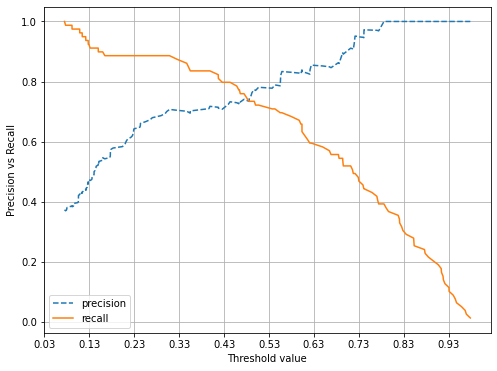

In [137]:
import matplotlib.pyplot as plt

# y_test : 실제 값 , pred_proba_c1 : 예측 확률 값
def precision_recall_curve_plot(y_test, pred_proba1):
    precisions , recalls , thresholds = precision_recall_curve(y_test , pred_proba1)
    plt.figure(figsize=(8,6))
    thresholds_n = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_n] , linestyle='--' , label='precision')
    plt.plot(thresholds, recalls[0:thresholds_n], label='recall')
    
    start , end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end , 0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision vs Recall')
    plt.legend()
    plt.grid()
    plt.show()
    
pred_proba1 - lr.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test , pred_proba1)

# F1 Score

### F1 Score
- 정밀도와 재현율의 조화평균

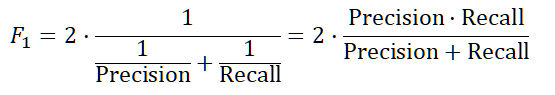

### 예 : 두 예측 모델 비교  
A 예측 모델
- 정밀도 : 0.9
- 재현율 : 0.1 (극단적 차이)
- F1 스코어 : 0.18

B 예측 모델
- 정밀도 : 0.5
- 재현율 : 0.5 (큰 차이 없음)
- F1 스코어 : 0.5 

B모델의 FI 스코어가 A모델에 비해 매우 우수

In [138]:
# 사이킷런의 F1 스코어 API : t1_score()
from sklearn.metrics import f1_score

f1 = f1_score(y_test , pred)
print('f1' , f1)

f1 0.7945205479452054


### 타이타닉 생존자 예측에서 F1 스코어
- 임계값을 변화시키면서 F1 스코어를 포함한 평가 지표 구하기
- 임계값 0.4~0.6별로 정확도, 정밀도, 재현율, F1 스코어 확인

In [139]:
def get_clf_eval(y_test, pred):
    # confusion matrix
    confusion = confusion_matrix(y_test, pred)
    # accuracy_score
    acc = accuracy_score(y_test , pred)
    # precision_score
    precision = precision_score(y_test , pred)
    # recall_score
    recall = recall_score(y_test , pred)
    # f1_score
    f1 = f1_score(y_test , pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.3f} , 정밀도: {1:.3f}, 재현율: {2:.3f} , f1: {3:.3f}'.format(acc, precision, recall , f1))

In [140]:
get_clf_eval(y_test , pred)

오차행렬
[[135   9]
 [ 21  58]]
정확도: 0.865 , 정밀도: 0.866, 재현율: 0.734 , f1: 0.795


In [141]:
# 임계값 0.4~0.6 별로 정확도 , 정밀도, 재현율 , F1 스코어 확인
thres = [0.4 , 0.45 , 0.5 , 0.55 , 0.6]
pred_proba1 = lr.predict_proba(X_test)
get_eval_by_thresholds(y_test , pred_proba[:,1].reshape(-1,1), thres)

오차행렬
[[118  26]
 [ 14  65]]
정확도: 0.821 , 정밀도: 0.714, 재현율: 0.823 , f1: 0.765
오차행렬
[[121  23]
 [ 17  62]]
정확도: 0.821 , 정밀도: 0.729, 재현율: 0.785 , f1: 0.756
오차행렬
[[128  16]
 [ 22  57]]
정확도: 0.830 , 정밀도: 0.781, 재현율: 0.722 , f1: 0.750
오차행렬
[[129  15]
 [ 24  55]]
정확도: 0.825 , 정밀도: 0.786, 재현율: 0.696 , f1: 0.738
오차행렬
[[133  11]
 [ 27  52]]
정확도: 0.830 , 정밀도: 0.825, 재현율: 0.658 , f1: 0.732


# G measure

- 정밀도와 재현율의 기하평균

- $ G = \sqrt{Precision × Recall}$

In [142]:
def get_clf_eval(y_test, pred):
    # G measure 추가하는 식 작성해보기

SyntaxError: unexpected EOF while parsing (<ipython-input-142-b22ee4383819>, line 2)

# ROC Curve와 AUC

### ROC(Reciver Operating Characteristic)

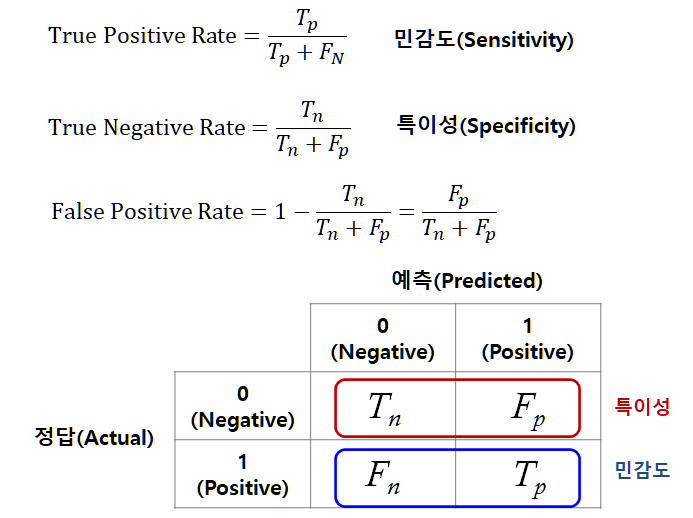



- TPR : 양성을 양성으로 판단한거  -> 예측 참 / 실제 참
- FPR : 음성을 양성으로 판단한거  -> 예측 참 / 실제 거짓

https://hsm-edu.tistory.com/1033

### AUC(Area Under the Curve)
- ROC 곡선 아래 면적
- 대각선의 직선에 대응되면 AUC는 0.5
- 1에 가까울수록 좋은 수치
- FPR이 작을 때 얼마나 큰 TPR을 얻는지에 따라 결정

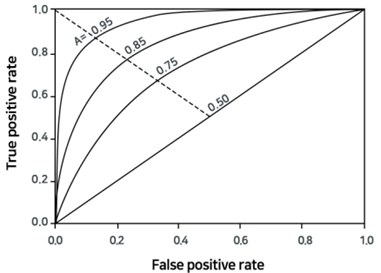

In [ ]:
from sklearn.metrics import roc_curve

pred_proba1 = lr.predict_proba(X_test)[:,1]

fprs , tprs , thresholds = roc_curve(y_test , pred_proba1)

idx = np.arange(1, thresholds.shape[0] , 5)
print('thresholds' , np.round(thresholds[idx] , 3))
print('TPR : ' , np.round(tprs[idx] , 3))
print('FPR : ' , np.round([idx] , 3))

In [ ]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    # ROC Curve를 plot 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    
    # 가운데 대각선 직선을 그림
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

In [ ]:
# 타이타닉 생존자 예측 로지스틱 회귀 모델의 ROC AUC 값 확인
from sklearn.metrics import roc_auc_score


roc_curve = roc_auc_score(y_test , pred)
print('roc_auc값' , roc_curve)

In [ ]:
# get_clf_eval() 변경
# ROC_AUC 추가 : 예측 확률값을 기반으로 계산되므로
# 매개변수 pred_proba = None 추가
def get_clf_eval(y_test, pred=None , pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    
    #ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test , pred , pred_proba1)

In [ ]:
# 임계값 0.4~0.6 별로 정확도 , 정밀도, 재현율 , F1 , auc 출력